In [12]:
from citipy import citipy as cp
import random
import pyowm
import numpy as np
from  urllib import request as urllib_request
import datetime
import json 
import matplotlib.pyplot as plt
from math import ceil as ceiling
import csv
import os
import pandas as pd
import requests as req
from scipy.stats.stats import pearsonr
import time
API="0b96cdf195c71f1105e53f361f7e2b27"
owm = pyowm.OWM(API)
url="http://api.openweathermap.org/data/2.5/weather?q="
units="&units=imperial"

In [13]:
cities = []
 
while len(cities) <= 500:
    latitude = random.randint(-90.00,90.00)
    longitude = random.randint(-180.00, 180.00)
    city = cp.nearest_city(latitude, longitude)
    if city not in cities:
        cities.append({
            'city code' : city,
            'city': city.city_name,
            'country': city.country_code,
            'latitude': latitude,
            'longitude': longitude,
        })
    else:
        continue
            
print(cities)

[{'city code': <citipy.citipy.City object at 0x00000246CDE5A5F8>, 'city': 'saskylakh', 'country': 'ru', 'latitude': 76, 'longitude': 119}, {'city code': <citipy.citipy.City object at 0x00000246CD7D48D0>, 'city': 'mataura', 'country': 'pf', 'latitude': -79, 'longitude': -150}, {'city code': <citipy.citipy.City object at 0x00000246CD567DD8>, 'city': 'tiznit', 'country': 'ma', 'latitude': 27, 'longitude': -8}, {'city code': <citipy.citipy.City object at 0x00000246CE4B69E8>, 'city': 'ilinge', 'country': 'za', 'latitude': -32, 'longitude': 27}, {'city code': <citipy.citipy.City object at 0x00000246CDF24978>, 'city': 'kirakira', 'country': 'sb', 'latitude': -8, 'longitude': 164}, {'city code': <citipy.citipy.City object at 0x00000246CCA26358>, 'city': 'punta arenas', 'country': 'cl', 'latitude': -66, 'longitude': -108}, {'city code': <citipy.citipy.City object at 0x00000246CC72FF60>, 'city': 'ushuaia', 'country': 'ar', 'latitude': -80, 'longitude': -54}, {'city code': <citipy.citipy.City obj

In [ ]:
weatherInfo={}
for x in cities:
    city = x['city']
    country = x['country']
    citycode = x['city code']
    latitude = x['latitude']
    longitude = x['longitude']
    cityCountryUnitsAPI=url+city+","+country+units+"&APPID="+API
    call=req.get(cityCountryUnitsAPI).json()
    
    for y in call:
        weatherInfo[city] = {
            'City': city,
            'Country':country,
            'Citycode':citycode,
            'Latitude':latitude,
            'Longitude':longitude,
            'Temperature (F)':call['main']['temp'],
            'Wind (mph)':call['wind']['speed'],
            'Humidity (%)':call['main']['humidity'],
            'Cloudiness (%)':call['clouds']['all'],
        }
    time.sleep(2)

In [15]:
weatherInfo

{'airai': {'City': 'airai',
  'Citycode': <citipy.citipy.City at 0x246cdac1d68>,
  'Cloudiness (%)': 40,
  'Country': 'pw',
  'Humidity (%)': 78,
  'Latitude': 16,
  'Longitude': 146,
  'Temperature (F)': 75.2,
  'Wind (mph)': 5.82},
 'aksarayskiy': {'City': 'aksarayskiy',
  'Citycode': <citipy.citipy.City at 0x246cdca7048>,
  'Cloudiness (%)': 0,
  'Country': 'ru',
  'Humidity (%)': 26,
  'Latitude': 48,
  'Longitude': 49,
  'Temperature (F)': 80.6,
  'Wind (mph)': 15.66},
 'aksum': {'City': 'aksum',
  'Citycode': <citipy.citipy.City at 0x246ccd53278>,
  'Cloudiness (%)': 32,
  'Country': 'et',
  'Humidity (%)': 38,
  'Latitude': 14,
  'Longitude': 38,
  'Temperature (F)': 82.52,
  'Wind (mph)': 5.41},
 'albany': {'City': 'albany',
  'Citycode': <citipy.citipy.City at 0x246cc6a4588>,
  'Cloudiness (%)': 24,
  'Country': 'au',
  'Humidity (%)': 69,
  'Latitude': -54,
  'Longitude': 119,
  'Temperature (F)': 61.1,
  'Wind (mph)': 6.42},
 'ambon': {'City': 'ambon',
  'Citycode': <citipy.

##### Instead of doing an API call from OWM, you can always install their package PYOWM and then do this:

for x in cities:

    city = x['city']
    country = x['country']
    citycode = x['city code']
    latitude = x['latitude']
    longitude = x['longitude']
    observation = owm.weather_at_place(city + ',' + country)
    w=observation.get_weather()
    temp = w.get_temperature()
    wind = w.get_wind()
    humid = w.get_humidity()
    cloud = w.get_clouds()
    weatherInfo[city] = {
        'city': city,
        'country':country,
        'citycode':citycode,
        'latitude':latitude,
        'longitude':longitude,
        'temperature':temp['temp'],
        'wind':wind['speed'],
        'humidity':humid,
        'cloudiness':cloud,
    }

In [16]:
weatherDF=pd.DataFrame.from_records(weatherInfo).T
weatherDF

,City,Citycode,Cloudiness (%),Country,Humidity (%),Latitude,Longitude,Temperature (F),Wind (mph)
airai,airai,<citipy.citipy.City object at 0x00000246CDAC1D68>,40,pw,78,16,146,75.2,5.82
aksarayskiy,aksarayskiy,<citipy.citipy.City object at 0x00000246CDCA7048>,0,ru,26,48,49,80.6,15.66
aksum,aksum,<citipy.citipy.City object at 0x00000246CCD53278>,32,et,38,14,38,82.52,5.41
albany,albany,<citipy.citipy.City object at 0x00000246CC6A4588>,24,au,69,-54,119,61.1,6.42
ambon,ambon,<citipy.citipy.City object at 0x00000246CD042B38>,75,id,88,-6,126,78.8,4.7
amderma,amderma,<citipy.citipy.City object at 0x00000246CDCACB38>,92,ru,79,70,59,41.57,16.15
anchorage,anchorage,<citipy.citipy.City object at 0x00000246CE0BF630>,90,us,100,64,-152,48.54,4.63
antofagasta,antofagasta,<citipy.citipy.City object at 0x00000246CCA1C080>,75,cl,71,-24,-79,57.2,6.93
ardahan,ardahan,<citipy.citipy.City object at 0x00000246CDFD1D68>,0,tr,18,41,43,69.8,5.82
arman,arman,<citipy.citipy.City object at 0x00000246CDCB6320>,90,ru,100,58,147,48.2,2.24


In [17]:
weatherDF2=weatherDF.drop('Citycode', axis=1).drop('City', axis=1).drop('Country', axis=1).drop('Longitude', axis=1)
weatherDF2

,Cloudiness (%),Humidity (%),Latitude,Temperature (F),Wind (mph)
airai,40,78,16,75.2,5.82
aksarayskiy,0,26,48,80.6,15.66
aksum,32,38,14,82.52,5.41
albany,24,69,-54,61.1,6.42
ambon,75,88,-6,78.8,4.7
amderma,92,79,70,41.57,16.15
anchorage,90,100,64,48.54,4.63
antofagasta,75,71,-24,57.2,6.93
ardahan,0,18,41,69.8,5.82
arman,90,100,58,48.2,2.24


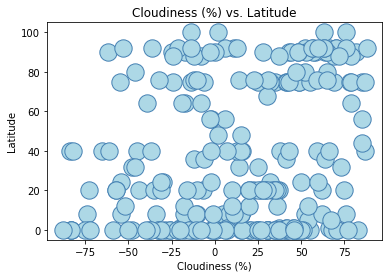

There was a significant correlation between Cloudiness (%) and latitude, r=0.22, n=249, p=0.0. Overall, there was a weak and positive correlation between the two variables. The higher the latitude, the higher the Cloudiness (%)


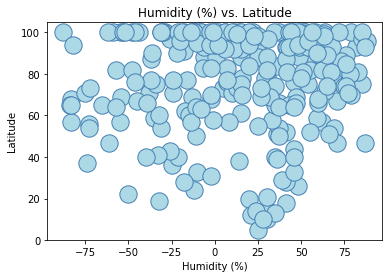

There was an insignificant correlation between Humidity (%) and latitude, r=0.05, n=249, p=0.4. Overall, there was a weak and positive correlation between the two variables. The higher the latitude, the higher the Humidity (%)


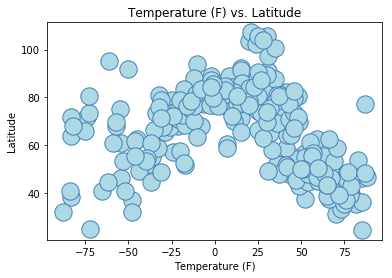

There was a significant correlation between Temperature (F) and latitude, r=-0.26, n=249, p=0.0. Overall, there was a weak and negative correlation between the two variables. The higher the latitude, the lower the Temperature (F)


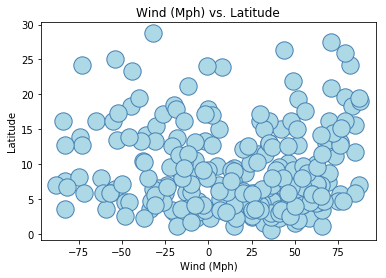

There was an insignificant correlation between Wind (mph) and latitude, r=-0.0, n=249, p=0.94. Overall, there was a weak and negative correlation between the two variables. The higher the latitude, the lower the Wind (mph)


In [18]:
for x in weatherDF2:
    if weatherDF2[x] is not weatherDF2['Latitude']:
        plt.scatter(weatherDF2.Latitude, weatherDF2[x], s=300, edgecolor='steelblue', c='lightblue')
        plt.title(f'%s vs. Latitude' % (x.title()))
        plt.ylabel("Latitude")
        plt.xlabel(x.title())
        PR=pearsonr(weatherDF.Latitude, weatherDF2[x])
        plt.show()
        def printanalysis(z,w):
            if w > 0.05:
                result="an insignificant"
            elif w < 0.05:
                result ="a significant"
            if z >= 0.5:
                description = "a strong and positive"
                direction = "higher"
            elif 0 < z < 0.5:
                description = "a weak and positive"
                direction = "higher"
            elif -0.5 < z < 0:
                description = "a weak and negative"
                direction = "lower"
            elif z <= 0.5:
                description = "a strong and negative"
                direction = "lower"
            else:
                description = "zero"
            print(f'There was %s correlation between %s and latitude, r=%s, n=%s, p=%s. Overall, there was %s correlation between the two variables. The higher the latitude, the %s the %s' % (result, x, round(PR[0],2), len(weatherDF), round(PR[1],2), description, direction, x))
        printanalysis(PR[0],PR[1])